<a href="https://colab.research.google.com/github/obeabi/NaturalLanguageProcessing/blob/master/Main_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TSNE Visualization on MNIST dataset

In [8]:

# Importing Necessary Modules. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler 
print("Installation finsished!")

Installation finsished!


In [9]:
#: Reading data

# Reading the data using pandas   
df = pd.read_csv('mnist_train.csv') 
  
# print first five rows of df 
print(df.head(4))  
  

   label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      4    0    0    0    0    0  ...      0      0      0      0      0      0
3      1    0    0    0    0    0  ...      0      0      0      0      0      0

[4 rows x 785 columns]


In [10]:
# Shape of dataframe
df.shape

(60000, 785)

In [11]:
# save the labels into a variable l. 
labels = df['label'] 
  
# Drop the label feature and store the pixel data in d. 
data = df.drop("label", axis = 1) 

In [12]:
# Data-preprocessing

# Data-preprocessing: Standardizing the data 
from sklearn.preprocessing import StandardScaler 
  
standardized_data = StandardScaler().fit_transform(data) 
  
print(standardized_data.shape)

(60000, 784)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


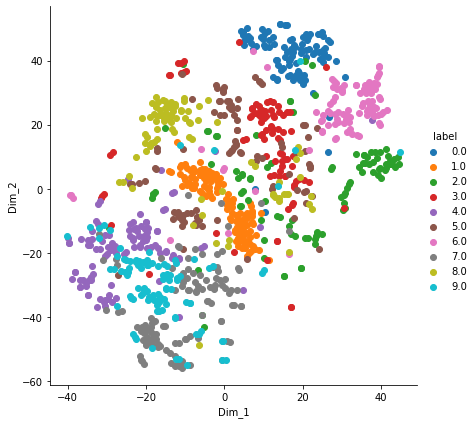

In [15]:
# TSNE 
# Picking the top 1000 points as TSNE 
# takes a lot of time for 15K points 
data_1000 = standardized_data[0:1000, :] 
labels_1000 = labels[0:1000] 
  
model = TSNE(n_components = 2, random_state = 0) 
# configuring the parameteres 
# the number of components = 2 
# default perplexity = 30 
# default learning rate = 200 
# default Maximum number of iterations 
# for the optimization = 1000 
  
tsne_data = model.fit_transform(data_1000) 
  
import seaborn as sns
# creating a new data frame which 
# help us in ploting the result data 
tsne_data = np.vstack((tsne_data.T, labels_1000)).T 
tsne_df = pd.DataFrame(data = tsne_data, 
     columns =("Dim_1", "Dim_2", "label")) 
  
# Ploting the result of tsne 
sns.FacetGrid(tsne_df, hue ="label", size = 6).map( 
       plt.scatter, 'Dim_1', 'Dim_2').add_legend() 
  
plt.show() 